In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np
from sklearn.linear_model import LinearRegression
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mldata.csv')

# Features and target for regression
features = data[['1', '2']]
target = data['LABEL']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predictions
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Evaluate regression performance
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mape, r2

# Training metrics
mse_train, rmse_train, mape_train, r2_train = evaluate_regression(y_train, y_train_pred)
print("\nTraining Regression Performance:")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAPE: {mape_train}, R2: {r2_train}")

# Test metrics
mse_test, rmse_test, mape_test, r2_test = evaluate_regression(y_test, y_test_pred)
print("\nTest Regression Performance:")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAPE: {mape_test}, R2: {r2_test}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Training Regression Performance:
MSE: 758.5656117528273, RMSE: 27.54206985236998, MAPE: 0.0056884210730505985, R2: 0.13778921808843925

Test Regression Performance:
MSE: 727.9166365466352, RMSE: 26.979930254665877, MAPE: 0.005529842953577105, R2: 0.13335796586336546


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


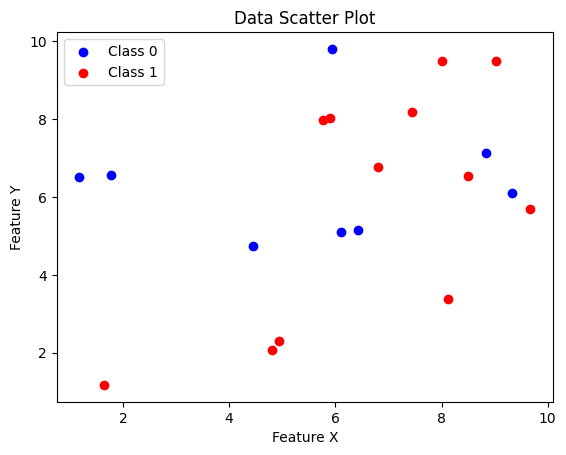

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack,csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
drive.mount('/content/drive')
sentence_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mldata.csv')

# Generate random data points
np.random.seed(0)
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)
classes = np.random.choice([0, 1], size=20)

# Scatter plot
plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0')
plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()
plt.title('Data Scatter Plot')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


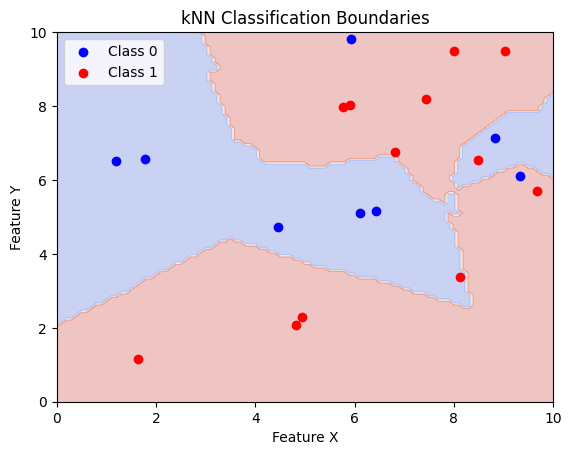

In [4]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack,csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
drive.mount('/content/drive')
sentence_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mldata.csv')

# Generate test data
test_X, test_Y = np.meshgrid(np.arange(0, 10.1, 0.1), np.arange(0, 10.1, 0.1))
test_data = np.c_[test_X.ravel(), test_Y.ravel()]

# Train kNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(np.c_[X, Y], classes)

# Predict test data
predicted_classes = knn.predict(test_data)
predicted_classes = predicted_classes.reshape(test_X.shape)

# Plot
plt.contourf(test_X, test_Y, predicted_classes, alpha=0.3, cmap='coolwarm')
plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0')
plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1')
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.legend()
plt.title('kNN Classification Boundaries')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


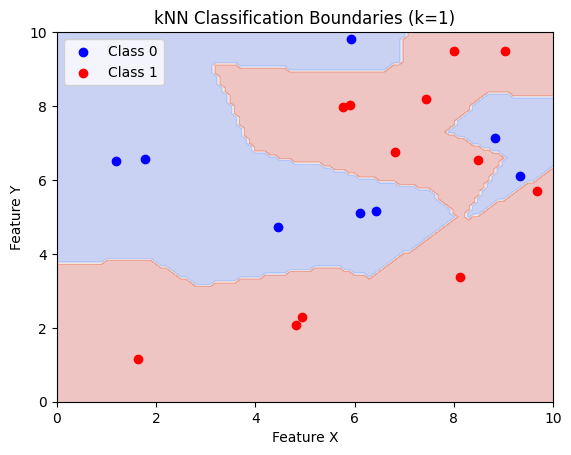

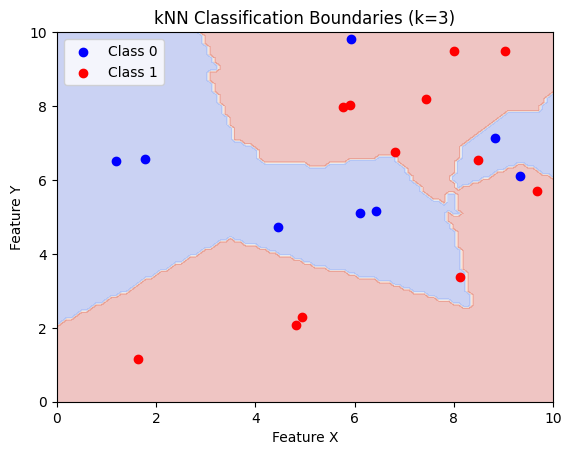

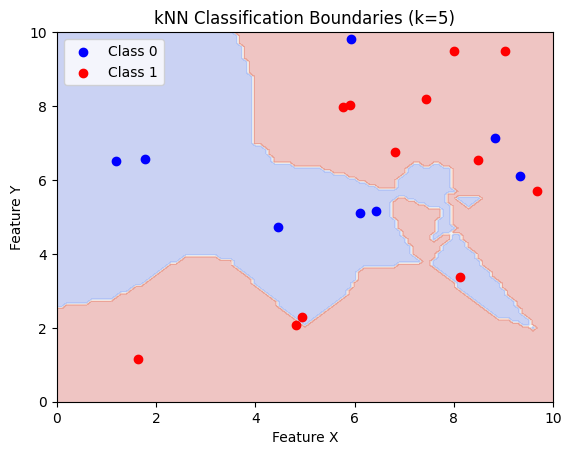

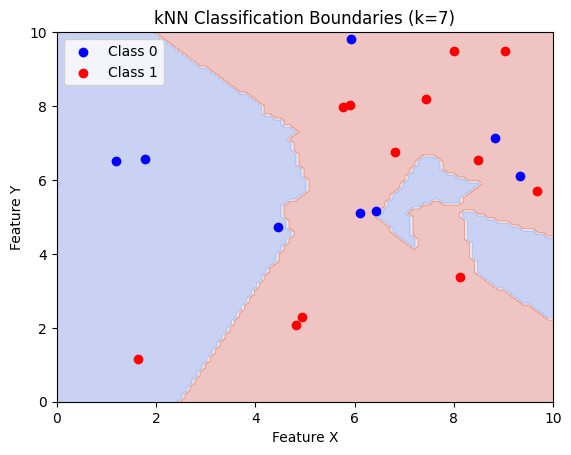

In [5]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack,csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
drive.mount('/content/drive')
sentence_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mldata.csv')
def plot_knn_with_different_k(X, Y, classes, test_data, test_X, test_Y, k_values):
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(np.c_[X, Y], classes)
        predicted_classes = knn.predict(test_data).reshape(test_X.shape)

        plt.figure()
        plt.contourf(test_X, test_Y, predicted_classes, alpha=0.3, cmap='coolwarm')
        plt.scatter(X[classes == 0], Y[classes == 0], color='blue', label='Class 0')
        plt.scatter(X[classes == 1], Y[classes == 1], color='red', label='Class 1')
        plt.xlabel('Feature X')
        plt.ylabel('Feature Y')
        plt.legend()
        plt.title(f'kNN Classification Boundaries (k={k})')
        plt.show()

# Example usage
plot_knn_with_different_k(X, Y, classes, test_data, test_X, test_Y, [1, 3, 5, 7])


In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.sparse import hstack,csr_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
drive.mount('/content/drive')
sentence_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mldata.csv')


# Assume the last column is the target variable and the rest are features
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
knn = KNeighborsClassifier()

# Define the parameter grid for k
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]}

# Using GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best k value
best_k = grid_search.best_params_['n_neighbors']
print(f'Best k value from GridSearchCV: {best_k}')

# Evaluate the model with the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with best k from GridSearchCV: {accuracy}')
# Best parameters
best_k = grid_search.best_params_['n_neighbors']
print(f'Best k value: {best_k}')


ModuleNotFoundError: No module named 'sklearn'